In [606]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from catboost import CatBoostRegressor, EShapCalcType, EFeaturesSelectionAlgorithm

In [607]:
data = pd.read_csv('train.csv')
data.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000


In [608]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  70265 non-null   float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  95104 non-null   float64
 9   g_lift      70008 non-null   float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

In [609]:
data = data.drop(columns='id')

# Поработаем с пропусками

build_tech заполним с как медиану по floor в каждой категории

In [610]:
data.groupby('floor')['build_tech'].median()

floor
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    1.0
12    1.0
13    2.0
14    2.0
15    2.0
16    2.0
17    2.0
18    2.0
19    2.0
20    2.0
21    2.0
22    2.0
23    2.0
24    2.0
25    2.0
Name: build_tech, dtype: float64

In [611]:
build_tech_by_floor = data.groupby('floor')['build_tech'].transform('median')

In [612]:
data['build_tech'] = data['build_tech'].fillna(build_tech_by_floor)
data.head()

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,2011-1,560,0.0,2,59,3,0,30.0,1.0,5,...,0,0,0,0,0,0,0,0,0,4510000
1,2011-1,667,1.0,10,50,2,1,25.0,NaN,1,...,0,0,0,0,0,0,0,0,0,13231000
2,2011-1,90,0.0,1,48,2,0,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,2008000
3,2011-1,94,1.0,3,62,3,1,30.0,NaN,3,...,0,0,0,0,0,0,0,0,0,12680000
4,2011-1,232,0.0,3,60,3,0,25.0,NaN,3,...,0,0,0,0,0,0,0,0,0,3335000


Пропуски в metro_dist просто дропнем, так как их не так много

In [613]:
data = data.dropna(subset='metro_dist')

In [614]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95104 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        95104 non-null  object 
 1   street_id   95104 non-null  int64  
 2   build_tech  95104 non-null  float64
 3   floor       95104 non-null  int64  
 4   area        95104 non-null  int64  
 5   rooms       95104 non-null  int64  
 6   balcon      95104 non-null  int64  
 7   metro_dist  95104 non-null  float64
 8   g_lift      66593 non-null  float64
 9   n_photos    95104 non-null  int64  
 10  kw1         95104 non-null  int64  
 11  kw2         95104 non-null  int64  
 12  kw3         95104 non-null  int64  
 13  kw4         95104 non-null  int64  
 14  kw5         95104 non-null  int64  
 15  kw6         95104 non-null  int64  
 16  kw7         95104 non-null  int64  
 17  kw8         95104 non-null  int64  
 18  kw9         95104 non-null  int64  
 19  kw10        95104 non-null  in

g_lift заполним с помошью Байесовского классификатора, то есть решим подзадачу машинного обучения (задачу классификации), где таргетом будет g_lift, а признаками - некоторые исходные признаки

In [588]:
df_g_lift = data[['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon', 'metro_dist', 'g_lift', 'n_photos']]

In [589]:
df_g_lift.head()

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos
0,560,0.0,2,59,3,0,30.0,1.0,5
1,667,1.0,10,50,2,1,25.0,NaN,1
2,90,0.0,1,48,2,0,25.0,0.0,1
3,94,1.0,3,62,3,1,30.0,NaN,3
4,232,0.0,3,60,3,0,25.0,NaN,3


In [590]:
df_g_lift_test = df_g_lift[df_g_lift['g_lift'].isna()]

In [591]:
df_g_lift_test = df_g_lift_test.drop(columns=['g_lift'])

In [592]:
df_g_lift_test

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,n_photos
1,667,1.0,10,50,2,1,25.0,1
3,94,1.0,3,62,3,1,30.0,3
4,232,0.0,3,60,3,0,25.0,3
11,452,0.0,3,58,3,0,30.0,6
15,645,1.0,3,52,2,0,20.0,4
...,...,...,...,...,...,...,...,...
99992,598,0.0,1,61,3,0,5.0,6
99995,401,0.0,5,30,1,0,30.0,1
99996,59,0.0,4,34,1,0,30.0,1
99997,253,0.0,3,52,2,0,5.0,4


In [593]:
df_g_lift_train = df_g_lift[df_g_lift['g_lift'].notna()]

In [594]:
df_g_lift_train

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos
0,560,0.0,2,59,3,0,30.0,1.0,5
2,90,0.0,1,48,2,0,25.0,0.0,1
5,453,1.0,5,52,2,0,30.0,1.0,1
6,44,0.0,1,33,1,0,30.0,1.0,0
7,74,2.0,16,44,1,2,20.0,0.0,1
...,...,...,...,...,...,...,...,...,...
99990,550,0.0,2,41,2,0,5.0,0.0,5
99991,370,1.0,11,91,3,1,30.0,1.0,7
99993,23,1.0,2,52,2,1,30.0,1.0,1
99994,377,0.0,2,35,1,0,30.0,1.0,4


In [595]:
g_lift_target = df_g_lift_train['g_lift']

In [596]:
df_g_lift_train = df_g_lift_train.drop(columns=['g_lift'])

In [597]:
model_NB = MultinomialNB().fit(df_g_lift_train, g_lift_target)

In [598]:
g_lift_pred = model_NB.predict(df_g_lift_test)

In [615]:
df_g_lift_test = pd.concat([df_g_lift_test, pd.DataFrame(g_lift_pred, columns=['g_lift'])], axis=1)

In [630]:
data.loc[data['g_lift'].isna(), 'g_lift'] = g_lift_pred

In [632]:
data.head()

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,2011-1,560,0.0,2,59,3,0,30.0,1.0,5,...,0,0,0,0,0,0,0,0,0,4510000
1,2011-1,667,1.0,10,50,2,1,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,13231000
2,2011-1,90,0.0,1,48,2,0,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,2008000
3,2011-1,94,1.0,3,62,3,1,30.0,1.0,3,...,0,0,0,0,0,0,0,0,0,12680000
4,2011-1,232,0.0,3,60,3,0,25.0,1.0,3,...,0,0,0,0,0,0,0,0,0,3335000


<Axes: xlabel='g_lift', ylabel='Density'>

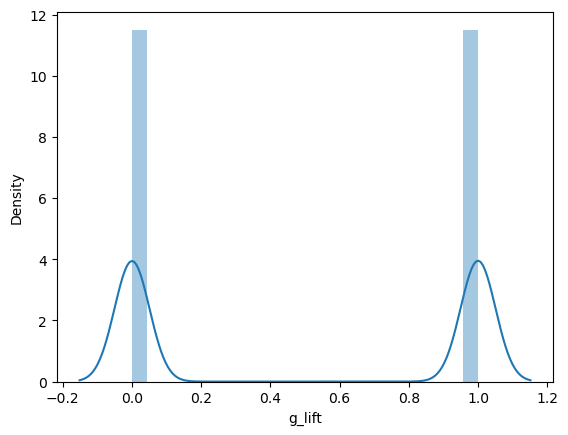

In [633]:
sns.distplot(data['g_lift'])

Теперь g_lift распределен равномерно

In [634]:
data.head()

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,2011-1,560,0.0,2,59,3,0,30.0,1.0,5,...,0,0,0,0,0,0,0,0,0,4510000
1,2011-1,667,1.0,10,50,2,1,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,13231000
2,2011-1,90,0.0,1,48,2,0,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,2008000
3,2011-1,94,1.0,3,62,3,1,30.0,1.0,3,...,0,0,0,0,0,0,0,0,0,12680000
4,2011-1,232,0.0,3,60,3,0,25.0,1.0,3,...,0,0,0,0,0,0,0,0,0,3335000


In [635]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95104 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        95104 non-null  object 
 1   street_id   95104 non-null  int64  
 2   build_tech  95104 non-null  float64
 3   floor       95104 non-null  int64  
 4   area        95104 non-null  int64  
 5   rooms       95104 non-null  int64  
 6   balcon      95104 non-null  int64  
 7   metro_dist  95104 non-null  float64
 8   g_lift      95104 non-null  float64
 9   n_photos    95104 non-null  int64  
 10  kw1         95104 non-null  int64  
 11  kw2         95104 non-null  int64  
 12  kw3         95104 non-null  int64  
 13  kw4         95104 non-null  int64  
 14  kw5         95104 non-null  int64  
 15  kw6         95104 non-null  int64  
 16  kw7         95104 non-null  int64  
 17  kw8         95104 non-null  int64  
 18  kw9         95104 non-null  int64  
 19  kw10        95104 non-null  in

Дропнем колонку date

In [636]:
data = data.drop(columns=['date'])

Попробуем решить задачу с помощью алгоритма градиентного бустинга, а именно с помощью CatBoost

In [393]:
!pip install catboost
!pip install plotly
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Подготовим данные

In [637]:
X = data.drop(columns=['price'])
y = data[['price']]

In [638]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [639]:
model_CB = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.080352
0:	learn: 4037111.2205569	total: 7.03ms	remaining: 7.03s
1:	learn: 3900272.2559687	total: 10ms	remaining: 4.99s
2:	learn: 3776553.9665323	total: 12.7ms	remaining: 4.21s
3:	learn: 3667374.6931889	total: 15.4ms	remaining: 3.82s
4:	learn: 3571433.4001026	total: 17.8ms	remaining: 3.53s
5:	learn: 3482615.2041849	total: 20.4ms	remaining: 3.38s
6:	learn: 3407133.5486463	total: 23ms	remaining: 3.26s
7:	learn: 3339384.5600266	total: 25.4ms	remaining: 3.15s
8:	learn: 3281056.5430350	total: 28ms	remaining: 3.08s
9:	learn: 3230475.2294112	total: 30.3ms	remaining: 3s
10:	learn: 3183560.5873250	total: 32.7ms	remaining: 2.94s
11:	learn: 3139421.5338434	total: 35.3ms	remaining: 2.91s
12:	learn: 3103442.1137285	total: 37.8ms	remaining: 2.87s
13:	learn: 3069019.5363435	total: 40.2ms	remaining: 2.83s
14:	learn: 3041288.0299333	total: 42.6ms	remaining: 2.79s
15:	learn: 3014971.3074900	total: 44.8ms	remaining: 2.76s
16:	learn: 2993719.4291689	total: 47.3ms	remaining: 2.73s
17:

154:	learn: 2584855.2001806	total: 388ms	remaining: 2.11s
155:	learn: 2583787.3814065	total: 390ms	remaining: 2.11s
156:	learn: 2583191.2784098	total: 393ms	remaining: 2.11s
157:	learn: 2581482.3587631	total: 395ms	remaining: 2.11s
158:	learn: 2579713.4009195	total: 398ms	remaining: 2.1s
159:	learn: 2577517.8962084	total: 401ms	remaining: 2.1s
160:	learn: 2576615.2239585	total: 404ms	remaining: 2.11s
161:	learn: 2575171.6316759	total: 407ms	remaining: 2.1s
162:	learn: 2574668.7219835	total: 409ms	remaining: 2.1s
163:	learn: 2573108.5607935	total: 412ms	remaining: 2.1s
164:	learn: 2571927.5631786	total: 414ms	remaining: 2.1s
165:	learn: 2567102.7106783	total: 417ms	remaining: 2.09s
166:	learn: 2565767.0057401	total: 420ms	remaining: 2.1s
167:	learn: 2564740.2353112	total: 424ms	remaining: 2.1s
168:	learn: 2563791.1010547	total: 426ms	remaining: 2.1s
169:	learn: 2562452.7746309	total: 429ms	remaining: 2.09s
170:	learn: 2560373.4712213	total: 432ms	remaining: 2.09s
171:	learn: 2558914.631

314:	learn: 2403388.6716747	total: 787ms	remaining: 1.71s
315:	learn: 2402592.7637151	total: 789ms	remaining: 1.71s
316:	learn: 2400488.2313912	total: 792ms	remaining: 1.71s
317:	learn: 2399616.7335655	total: 794ms	remaining: 1.7s
318:	learn: 2399390.9494148	total: 796ms	remaining: 1.7s
319:	learn: 2398830.3740838	total: 799ms	remaining: 1.7s
320:	learn: 2397838.7753414	total: 801ms	remaining: 1.7s
321:	learn: 2396194.8594555	total: 804ms	remaining: 1.69s
322:	learn: 2395844.3407837	total: 806ms	remaining: 1.69s
323:	learn: 2393855.6721016	total: 809ms	remaining: 1.69s
324:	learn: 2393675.9039204	total: 811ms	remaining: 1.68s
325:	learn: 2393408.7011695	total: 814ms	remaining: 1.68s
326:	learn: 2392916.6219006	total: 816ms	remaining: 1.68s
327:	learn: 2391887.4064958	total: 819ms	remaining: 1.68s
328:	learn: 2391164.3208260	total: 822ms	remaining: 1.68s
329:	learn: 2390591.4281716	total: 825ms	remaining: 1.67s
330:	learn: 2389799.4074047	total: 827ms	remaining: 1.67s
331:	learn: 238841

471:	learn: 2289608.2778696	total: 1.19s	remaining: 1.33s
472:	learn: 2289190.6058168	total: 1.19s	remaining: 1.33s
473:	learn: 2288503.8783515	total: 1.2s	remaining: 1.33s
474:	learn: 2287508.2766176	total: 1.2s	remaining: 1.32s
475:	learn: 2287173.2420496	total: 1.2s	remaining: 1.32s
476:	learn: 2286750.9672064	total: 1.2s	remaining: 1.32s
477:	learn: 2286025.6763040	total: 1.21s	remaining: 1.32s
478:	learn: 2285459.5430445	total: 1.21s	remaining: 1.31s
479:	learn: 2285191.1925480	total: 1.21s	remaining: 1.31s
480:	learn: 2284474.8973376	total: 1.21s	remaining: 1.31s
481:	learn: 2284290.9134761	total: 1.22s	remaining: 1.31s
482:	learn: 2283311.0470415	total: 1.22s	remaining: 1.3s
483:	learn: 2282901.6565946	total: 1.22s	remaining: 1.3s
484:	learn: 2281775.7806390	total: 1.22s	remaining: 1.3s
485:	learn: 2280944.4787671	total: 1.23s	remaining: 1.3s
486:	learn: 2280449.2077653	total: 1.23s	remaining: 1.3s
487:	learn: 2279536.3227987	total: 1.23s	remaining: 1.29s
488:	learn: 2278920.236

629:	learn: 2211451.6752964	total: 1.59s	remaining: 934ms
630:	learn: 2211241.9873596	total: 1.59s	remaining: 932ms
631:	learn: 2210985.7426354	total: 1.59s	remaining: 929ms
632:	learn: 2210569.2208296	total: 1.6s	remaining: 926ms
633:	learn: 2210368.3418967	total: 1.6s	remaining: 924ms
634:	learn: 2209627.0942472	total: 1.6s	remaining: 921ms
635:	learn: 2209416.4909898	total: 1.6s	remaining: 919ms
636:	learn: 2209099.9016555	total: 1.61s	remaining: 916ms
637:	learn: 2208858.8438014	total: 1.61s	remaining: 914ms
638:	learn: 2208580.6371125	total: 1.61s	remaining: 911ms
639:	learn: 2208205.5162783	total: 1.61s	remaining: 909ms
640:	learn: 2207484.5396712	total: 1.62s	remaining: 906ms
641:	learn: 2207064.0982460	total: 1.62s	remaining: 904ms
642:	learn: 2206856.7364934	total: 1.62s	remaining: 901ms
643:	learn: 2206031.7112974	total: 1.63s	remaining: 898ms
644:	learn: 2205369.0919579	total: 1.63s	remaining: 896ms
645:	learn: 2205114.6852094	total: 1.63s	remaining: 893ms
646:	learn: 220481

846:	learn: 2131030.9222703	total: 2.19s	remaining: 396ms
847:	learn: 2130365.2291042	total: 2.19s	remaining: 393ms
848:	learn: 2130089.9598772	total: 2.2s	remaining: 391ms
849:	learn: 2129959.0320873	total: 2.2s	remaining: 388ms
850:	learn: 2129605.1949907	total: 2.2s	remaining: 385ms
851:	learn: 2129155.8957169	total: 2.2s	remaining: 383ms
852:	learn: 2129058.9850301	total: 2.21s	remaining: 380ms
853:	learn: 2128885.8615443	total: 2.21s	remaining: 378ms
854:	learn: 2128451.6794575	total: 2.21s	remaining: 375ms
855:	learn: 2128156.5019525	total: 2.21s	remaining: 372ms
856:	learn: 2127941.1975043	total: 2.21s	remaining: 370ms
857:	learn: 2127638.8651218	total: 2.22s	remaining: 367ms
858:	learn: 2127422.4165426	total: 2.22s	remaining: 364ms
859:	learn: 2127274.5220100	total: 2.22s	remaining: 362ms
860:	learn: 2127087.6767525	total: 2.23s	remaining: 359ms
861:	learn: 2126733.8690278	total: 2.23s	remaining: 357ms
862:	learn: 2126467.6800160	total: 2.23s	remaining: 354ms
863:	learn: 212608

In [640]:
print(model_CB.score(X_test, y_test))
print(model_CB.score(X_train, y_train))

0.6955142225907839
0.7520827653556794


# Добавим признаков

In [641]:
data.columns

Index(['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon',
       'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5',
       'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13', 'price'],
      dtype='object')

Расширим признаковое пространство: добавим такие признаки, как: средняя площадь комнаты, квадрат площади, медианная цена по улице и так далее

In [642]:
data['area_on_room'] = data['area'] / data['rooms']
data['build_tech_floor'] = data['build_tech'] * data['floor']
data['area_n_photos'] = data['area'] / data['n_photos']
data['build_tech_balcon'] = data['build_tech'] * data['balcon']
data['street_id_metro_dist'] = data['street_id'] * data['metro_dist']
data['balcon_on_room'] = data['balcon'] / data['rooms']
data['g_lift_floor'] = data['g_lift'] / data['floor']
data['area2'] = data['area']**2


In [643]:
price_street = data.groupby('street_id')['price'].median()

In [644]:
price_street

street_id
0       3598500.0
1       2981000.0
2       4262500.0
3       2649000.0
4       9191500.0
          ...    
667    11822500.0
668     3440500.0
669     2593000.0
670     3670000.0
671     5188500.0
Name: price, Length: 672, dtype: float64

In [645]:
data['price_street'] = [price_street[data['street_id'].iloc[i]] for i in range(len(data['street_id']))]

In [646]:
price_metro_dist = data.groupby('metro_dist')['price'].median()
price_metro_dist

metro_dist
0.0     5000000.0
5.0     4614000.0
10.0    4650000.0
15.0    4446500.0
20.0    4287000.0
25.0    4038500.0
30.0    3738000.0
Name: price, dtype: float64

In [647]:
data['price_metro_dist'] = [price_metro_dist[data['metro_dist'].iloc[i]] for i in range(len(data['metro_dist']))]

In [648]:
price_floor = data.groupby('floor')['price'].mean()
price_floor

floor
1     4.259901e+06
2     4.640739e+06
3     4.685222e+06
4     4.715392e+06
5     4.567195e+06
6     5.702014e+06
7     5.705645e+06
8     5.783703e+06
9     5.661480e+06
10    6.641735e+06
11    6.743783e+06
12    6.444771e+06
13    8.472796e+06
14    8.232427e+06
15    7.951391e+06
16    7.953774e+06
17    8.169192e+06
18    8.600412e+06
19    8.279995e+06
20    8.915626e+06
21    8.681667e+06
22    8.313038e+06
23    8.356932e+06
24    8.253332e+06
25    7.730482e+06
Name: price, dtype: float64

In [649]:
data['price_floor'] = [price_floor[data['floor'].iloc[i]] for i in range(len(data['floor']))]

In [650]:
price_build_tech = data.groupby('build_tech')['price'].median()
price_build_tech

build_tech
0.0    3442000.0
1.0    5078000.0
2.0    8259000.0
Name: price, dtype: float64

In [651]:
data['price_build_tech'] = [price_build_tech[data['build_tech'].iloc[i]] for i in range(len(data['build_tech']))]

In [652]:
X = data.drop(columns=['price'])
y = data[['price']]

In [653]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [654]:
from catboost import Pool
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

important_features = np.array(list(X.columns))

In [421]:
from hyperopt import hp, fmin, tpe, Trials
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Определение функции, которую мы будем оптимизировать (в данном случае - средняя абсолютная ошибка)
def objective(params):
    # Преобразование гиперпараметров в формат CatBoost
    cb_params = {
        'iterations': int(params['iterations']),
        'learning_rate': params['learning_rate'],
        'depth': int(params['depth']),
        'l2_leaf_reg': params['l2_leaf_reg'],
        'loss_function': 'MAE',  # Используем среднюю абсолютную ошибку
        'random_seed': 42,  # Задаем одинаковое значение для воспроизводимости результатов
        'verbose': False  # Отключаем вывод для уменьшения объема сообщений
    }
    
    # Создание модели CatBoostRegressor с заданными гиперпараметрами
    cb_regressor = CatBoostRegressor(**cb_params)
    
    # Оценка модели с помощью кросс-валидации
    scores = cross_val_score(cb_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')
    
    # Возвращаем среднюю абсолютную ошибку
    return -scores.mean()

# Определение пространства поиска гиперпараметров
space = {
    'iterations': hp.quniform('iterations', 100, 1000, 100),  # Количество итераций
    'learning_rate': hp.loguniform('learning_rate', -3, 0),  # Скорость обучения
    'depth': hp.quniform('depth', 3, 10, 1),  # Глубина дерева
    'l2_leaf_reg': hp.loguniform('l2_leaf_reg', -3, 3)  # Регуляризация L2
}

# Создание объекта Trials для сохранения результатов оптимизации
trials = Trials()

# Оптимизация гиперпараметров с помощью алгоритма TPE (Tree-structured Parzen Estimator)
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

# Вывод результатов
print("Лучшие гиперпараметры:", best)


100%|███████████| 50/50 [12:18<00:00, 14.78s/trial, best loss: 913488.478073113]
Лучшие гиперпараметры: {'depth': 8.0, 'iterations': 900.0, 'l2_leaf_reg': 1.4245013154682566, 'learning_rate': 0.20681238115526557}


In [655]:
from catboost import CatBoostRegressor, EShapCalcType, EFeaturesSelectionAlgorithm

def select_features(algorithm: EFeaturesSelectionAlgorithm, steps: int = 1):
    print('Algorithm:', algorithm)
    model = CatBoostRegressor(iterations=900, learning_rate=0.20681238115526557, depth=8, l2_leaf_reg=1.4245013154682566, random_seed=0)
    summary = model.select_features(
        train_pool,
        eval_set=test_pool,
        features_for_select=list(range(train_pool.num_col())),
        num_features_to_select=20,
        steps=steps,
        algorithm=algorithm,
        shap_calc_type=EShapCalcType.Regular,
        train_final_model=True,
        logging_level='Silent',
        plot=True
    )
    print('Selected features:', summary['selected_features_names'])
    return summary

In [656]:
summary = select_features(algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues, steps=9)


Algorithm: EFeaturesSelectionAlgorithm.RecursiveByShapValues


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Selected features: ['street_id', 'build_tech', 'area', 'rooms', 'metro_dist', 'kw1', 'kw3', 'kw4', 'kw5', 'kw6', 'kw8', 'kw9', 'kw13', 'area_on_room', 'balcon_on_room', 'area2', 'price_street', 'price_metro_dist', 'price_floor', 'price_build_tech']


In [657]:
selected = ['street_id', 'build_tech', 'area', 'rooms', 'metro_dist', 'kw1', 'kw3', 'kw4', 'kw5', 'kw6', 'kw8', 'kw9', 'kw13', 'area_on_room', 'balcon_on_room', 'area2', 'price_street', 'price_metro_dist', 'price_floor', 'price_build_tech']

In [658]:
selected.append('price')

In [659]:
selected

['street_id',
 'build_tech',
 'area',
 'rooms',
 'metro_dist',
 'kw1',
 'kw3',
 'kw4',
 'kw5',
 'kw6',
 'kw8',
 'kw9',
 'kw13',
 'area_on_room',
 'balcon_on_room',
 'area2',
 'price_street',
 'price_metro_dist',
 'price_floor',
 'price_build_tech',
 'price']

In [660]:
df = data[selected]
X = df.drop(columns=['price'])

In [661]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)

In [662]:
model_CB = CatBoostRegressor(iterations=900, learning_rate=0.20681238115526557, depth=8, l2_leaf_reg=1.4245013154682566, random_seed=0).fit(X_train, y_train)

0:	learn: 3576434.4127714	total: 5.47ms	remaining: 4.92s
1:	learn: 3131924.6441580	total: 9.44ms	remaining: 4.24s
2:	learn: 2768932.5404359	total: 13ms	remaining: 3.88s
3:	learn: 2482967.7211674	total: 16.8ms	remaining: 3.77s
4:	learn: 2276691.8271274	total: 20.2ms	remaining: 3.62s
5:	learn: 2121857.4625796	total: 23.3ms	remaining: 3.46s
6:	learn: 1996036.2878857	total: 26.7ms	remaining: 3.41s
7:	learn: 1902413.9772007	total: 29.5ms	remaining: 3.29s
8:	learn: 1832926.8864277	total: 32.2ms	remaining: 3.19s
9:	learn: 1778868.7374152	total: 35.1ms	remaining: 3.13s
10:	learn: 1736645.7821945	total: 37.5ms	remaining: 3.03s
11:	learn: 1699608.8615615	total: 40.2ms	remaining: 2.97s
12:	learn: 1669532.3620795	total: 42.7ms	remaining: 2.92s
13:	learn: 1645671.8809881	total: 45.1ms	remaining: 2.85s
14:	learn: 1622855.5279304	total: 47.5ms	remaining: 2.8s
15:	learn: 1606914.8944621	total: 49.7ms	remaining: 2.75s
16:	learn: 1592352.5739032	total: 51.9ms	remaining: 2.69s
17:	learn: 1581007.5419665	

184:	learn: 1135501.1270331	total: 405ms	remaining: 1.57s
185:	learn: 1134713.2650545	total: 408ms	remaining: 1.56s
186:	learn: 1133469.0749350	total: 410ms	remaining: 1.56s
187:	learn: 1132689.2844326	total: 412ms	remaining: 1.56s
188:	learn: 1131296.0553221	total: 414ms	remaining: 1.56s
189:	learn: 1130203.8945081	total: 416ms	remaining: 1.55s
190:	learn: 1127899.4457704	total: 418ms	remaining: 1.55s
191:	learn: 1126332.0481730	total: 420ms	remaining: 1.55s
192:	learn: 1124905.5622531	total: 422ms	remaining: 1.55s
193:	learn: 1124035.1372173	total: 425ms	remaining: 1.55s
194:	learn: 1123316.2972647	total: 428ms	remaining: 1.55s
195:	learn: 1121447.0282299	total: 430ms	remaining: 1.54s
196:	learn: 1120564.0094091	total: 433ms	remaining: 1.54s
197:	learn: 1119733.9483250	total: 435ms	remaining: 1.54s
198:	learn: 1118708.3629449	total: 437ms	remaining: 1.54s
199:	learn: 1117621.3186406	total: 440ms	remaining: 1.54s
200:	learn: 1115634.8624546	total: 442ms	remaining: 1.54s
201:	learn: 11

371:	learn: 961549.9297911	total: 806ms	remaining: 1.14s
372:	learn: 961240.4792983	total: 808ms	remaining: 1.14s
373:	learn: 960261.0034221	total: 810ms	remaining: 1.14s
374:	learn: 959255.3290028	total: 812ms	remaining: 1.14s
375:	learn: 958407.5549917	total: 814ms	remaining: 1.13s
376:	learn: 957551.4920083	total: 816ms	remaining: 1.13s
377:	learn: 956492.2280325	total: 818ms	remaining: 1.13s
378:	learn: 955696.3438072	total: 820ms	remaining: 1.13s
379:	learn: 954883.0465535	total: 822ms	remaining: 1.13s
380:	learn: 954316.4232107	total: 824ms	remaining: 1.12s
381:	learn: 953954.1647192	total: 826ms	remaining: 1.12s
382:	learn: 953363.3380425	total: 828ms	remaining: 1.12s
383:	learn: 952410.8984649	total: 830ms	remaining: 1.11s
384:	learn: 951800.8409976	total: 832ms	remaining: 1.11s
385:	learn: 950691.3184248	total: 834ms	remaining: 1.11s
386:	learn: 950301.6169950	total: 836ms	remaining: 1.11s
387:	learn: 949777.1925292	total: 838ms	remaining: 1.1s
388:	learn: 949008.1295000	total

562:	learn: 844642.9933194	total: 1.21s	remaining: 722ms
563:	learn: 844306.4561015	total: 1.21s	remaining: 720ms
564:	learn: 843484.0148676	total: 1.21s	remaining: 717ms
565:	learn: 843249.1165144	total: 1.21s	remaining: 715ms
566:	learn: 842735.1720991	total: 1.21s	remaining: 713ms
567:	learn: 842323.8453266	total: 1.22s	remaining: 711ms
568:	learn: 841786.7065854	total: 1.22s	remaining: 709ms
569:	learn: 841248.8570024	total: 1.22s	remaining: 706ms
570:	learn: 840871.8638847	total: 1.22s	remaining: 704ms
571:	learn: 840136.1050731	total: 1.22s	remaining: 702ms
572:	learn: 839704.8271474	total: 1.23s	remaining: 700ms
573:	learn: 839025.9517063	total: 1.23s	remaining: 698ms
574:	learn: 838763.4825548	total: 1.23s	remaining: 696ms
575:	learn: 838562.6165246	total: 1.23s	remaining: 693ms
576:	learn: 837982.3834518	total: 1.23s	remaining: 691ms
577:	learn: 837273.1309458	total: 1.24s	remaining: 689ms
578:	learn: 836858.6457949	total: 1.24s	remaining: 687ms
579:	learn: 835750.9663072	tota

754:	learn: 763826.3851523	total: 1.61s	remaining: 309ms
755:	learn: 763632.4419599	total: 1.61s	remaining: 307ms
756:	learn: 763490.8238796	total: 1.61s	remaining: 304ms
757:	learn: 763120.3086994	total: 1.61s	remaining: 302ms
758:	learn: 762693.9087148	total: 1.61s	remaining: 300ms
759:	learn: 762142.0308754	total: 1.62s	remaining: 298ms
760:	learn: 761683.9274071	total: 1.62s	remaining: 296ms
761:	learn: 761035.8729606	total: 1.62s	remaining: 294ms
762:	learn: 760746.4307894	total: 1.66s	remaining: 298ms
763:	learn: 760534.3641412	total: 1.67s	remaining: 297ms
764:	learn: 760214.2757520	total: 1.67s	remaining: 295ms
765:	learn: 759813.4732291	total: 1.68s	remaining: 294ms
766:	learn: 759397.4387826	total: 1.68s	remaining: 292ms
767:	learn: 759052.7046081	total: 1.68s	remaining: 289ms
768:	learn: 758641.7328581	total: 1.69s	remaining: 287ms
769:	learn: 758390.4900980	total: 1.69s	remaining: 285ms
770:	learn: 758024.7884338	total: 1.69s	remaining: 283ms
771:	learn: 757714.4151044	tota

In [663]:
model_CB.score(X_test, y_test)

0.8444621031675607

In [664]:
model_CB.score(X_train, y_train)

0.9710248474272106

In [665]:
X_test

,street_id,build_tech,area,rooms,metro_dist,kw1,kw3,kw4,kw5,kw6,kw8,kw9,kw13,area_on_room,balcon_on_room,area2,price_street,price_metro_dist,price_floor,price_build_tech
14957,438,0.0,184,5,0.0,0,0,0,0,0,0,0,0,36.800000,0.000000,33856,4545000.0,5000000.0,5.702014e+06,3442000.0
42212,641,0.0,41,2,30.0,0,0,0,0,0,0,0,0,20.500000,0.000000,1681,2849000.0,3738000.0,4.259901e+06,3442000.0
26028,422,0.0,59,3,20.0,0,0,0,0,0,0,0,0,19.666667,0.000000,3481,3837500.0,4287000.0,4.259901e+06,3442000.0
59554,384,1.0,60,3,5.0,0,0,0,0,0,0,0,0,20.000000,0.333333,3600,2133000.0,4614000.0,4.685222e+06,5078000.0
80730,56,1.0,87,3,30.0,1,0,0,0,0,0,0,0,29.000000,0.333333,7569,4708000.0,3738000.0,4.567195e+06,5078000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40244,13,0.0,34,1,15.0,0,0,0,0,0,0,0,0,34.000000,0.000000,1156,6894000.0,4446500.0,5.661480e+06,3442000.0
96417,167,0.0,54,3,25.0,0,0,0,0,0,0,0,0,18.000000,0.000000,2916,3612000.0,4038500.0,4.640739e+06,3442000.0
19341,372,2.0,68,2,30.0,0,0,0,0,0,0,0,0,34.000000,0.000000,4624,4789500.0,3738000.0,6.641735e+06,8259000.0
21694,80,2.0,88,3,30.0,0,0,0,0,0,0,0,0,29.333333,0.666667,7744,4719500.0,3738000.0,8.169192e+06,8259000.0


In [666]:
mean_absolute_error(y_test, model_CB.predict(X_test))

827553.2474275735

# Подготовим тестовые данные

In [667]:
data_test = pd.read_csv('test.csv')

In [668]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  69980 non-null   float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  94883 non-null   float64
 9   g_lift      70186 non-null   float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

In [669]:
data_test['build_tech'] = data_test['build_tech'].fillna(data_test['build_tech'].mode()[0])
data_test['g_lift'] = data_test['g_lift'].fillna(data_test['g_lift'].mode()[0])
data_test['metro_dist'] = data_test['metro_dist'].fillna(data_test['metro_dist'].median())

In [670]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  100000 non-null  float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  100000 non-null  float64
 9   g_lift      100000 non-null  float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

In [671]:
data_test = data_test.drop(columns=['date'])

In [672]:
data_test['area_on_room'] = data_test['area'] / data_test['rooms']
data_test['build_tech_floor'] = data_test['build_tech'] * data_test['floor']
data_test['area_n_photos'] = data_test['area'] / data_test['n_photos']
data_test['build_tech_balcon'] = data_test['build_tech'] * data_test['balcon']
data_test['street_id_metro_dist'] = data_test['street_id'] * data_test['metro_dist']
data_test['balcon_on_room'] = data_test['balcon'] / data_test['rooms']
data_test['g_lift_floor'] = data_test['g_lift'] / data_test['floor']
data_test['area2'] = data_test['area']**2


In [673]:
data_test['price_street'] = [price_street[data_test['street_id'].iloc[i]] for i in range(len(data_test['street_id']))]

In [674]:
data_test['price_metro_dist'] = [price_metro_dist[data_test['metro_dist'].iloc[i]] for i in range(len(data_test['metro_dist']))]

In [676]:
data_test['price_build_tech'] = [price_build_tech[data_test['build_tech'].iloc[i]] for i in range(len(data_test['build_tech']))]

In [678]:
data_test['price_floor'] = [price_floor[data_test['floor'].iloc[i]] for i in range(len(data_test['floor']))]

In [679]:
data_test = data_test[selected[:-1]]

In [680]:
ans = pd.DataFrame()
ans['id'] = [100000+i for i in range(len(model_CB.predict(data_test)))]
ans['price'] = model_CB.predict(data_test)
ans

,id,price
0,100000,7.598306e+06
1,100001,4.240258e+06
2,100002,3.543468e+06
3,100003,2.724871e+06
4,100004,6.309861e+06
...,...,...
99995,199995,2.059737e+06
99996,199996,5.849009e+06
99997,199997,5.106327e+06
99998,199998,3.558599e+06


In [681]:
ans.to_csv('ans.csv')

# Вывод

В данном домашнем задании я попрактиковался с градиентным бустингом. Ключевой идеей улучшения скора являлось добавление нового признака, который "сливает" информацию о цене в обучающую выборку - это очень хорошо повысило скор моей модели